In [1]:
import numpy as np
from numpy import cos, sin

from scipy.linalg import block_diag

%matplotlib inline
import matplotlib.pyplot as plt

In [149]:
np.sqrt(2)

1.4142135623730951

In [2]:
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sp = 0.5*(sx + 1j*sy)
sm = 0.5*(sx - 1j*sy)

In [109]:
# Tight binding parameters, constants.
# D_i = Delta_i. Key for hopping parameter indices is sigma = s,
# pi = p, delta = d.

phi = np.arccos(np.sqrt(4./7))

# Tight binding parameters [eV] ###
D0 = -1.512
D1 = 0.419
D2 = -3.025
Dp = -1.276
Dz = -8.236
Vpds = -2.619
Vpdp = -1.396
Vdds = -0.933
Vddp = -0.478
Vddd = -0.442
Vpps = 0.696
Vppp = 0.278
Upps = -0.774
Uppp = 0.123
#############

E1 = 0.5*(-Vpds*(sin(phi)**2 - 0.5*cos(phi)**2) + np.sqrt(3.)*Vpdp*sin(phi)**2)*cos(phi)
E2 = (-Vpds*( sin(phi)**2 - 0.5*cos(phi)**2 ) - np.sqrt(3.)*Vpdp*cos(phi)**2)*sin(phi)
E3 = 0.25*(np.sqrt(3.)/2*Vpds*cos(phi)**3 + Vpdp*cos(phi)*sin(phi)**2)
E4 = 0.5*(np.sqrt(3.)/2*Vpds*sin(phi)*cos(phi)**2 - Vpdp*sin(phi)*cos(phi)**2)
E5 = -0.75*Vpdp*cos(phi)
E6 = -0.75*Vpdp*sin(phi)
E7 = 0.25*( -np.sqrt(3.)*Vpds*cos(phi)**2 - Vpdp*(1-2*cos(phi)**2) )*sin(phi)
E8 = 0.5*(-np.sqrt(3)*Vpds*sin(phi)**2 - Vpdp*(1-2*sin(phi)**2))*cos(phi)
E9 = 0.25*Vdds + 0.75*Vddd
E10 = -np.sqrt(3.)/4*(Vdds - Vddd)
E11 = 0.75*Vdds + 0.25*Vddd
E12 = Vddp
E13 = Vddp
E14 = Vddd
E15 = Vpps
E16 = Vppp

# Unitary that block diagonalizes the Bloch Hamiltonian into even and odd blocks under z -> -z.
U = np.array([[0, 0, 0, 1./np.sqrt(2), 0, 0, 0, 0, 1./np.sqrt(2), 0, 0],
              [0, 0, 0, 0, 1./np.sqrt(2), 0, 0, 0, 0, 1./np.sqrt(2), 0],
              [0, 0, 0, 0, 0, 1./np.sqrt(2), 0, 0, 0, 0, 1./np.sqrt(2)],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1./np.sqrt(2), 0, 0, 0, 0, -1./np.sqrt(2), 0, 0],
              [0, 0, 0, 0, 1./np.sqrt(2), 0, 0, 0, 0, -1./np.sqrt(2), 0],
              [0, 0, 0, 0, 0, -1./np.sqrt(2), 0, 0, 0, 0, 1./np.sqrt(2)]])

In [110]:
assert np.allclose(U.T.conj().dot(U), np.eye(U.shape[0]))

In [111]:
def make_SOI_Hams(lambda_M, lambda_S):
    MEEuu = np.array([[0, 0, 0, 0, 0, 0],
                    [0, 0, -1j*lambda_M, 0, 0, 0],
                    [0, 1j*lambda_M, 0, 0, 0, 0],
                    [0, 0, 0, 0, -0.5*1j*lambda_S, 0],
                    [0, 0, 0, 0.5*1j*lambda_S, 0, 0],
                    [0, 0, 0, 0, 0, 0]])
    MEEdd = -MEEuu

    MOOuu = 0.5*np.array([[0, -1j*lambda_M, 0, 0, 0],
                          [1j*lambda_M, 0, 0, 0, 0],
                          [0, 0, 0, -1j*lambda_S, 0],
                          [0, 0, 1j*lambda_S, 0, 0],
                          [0, 0, 0, 0, 0]])
    MOOdd = -MOOuu

    MEOud = 0.5*np.array([[-np.sqrt(3.)*lambda_M, 1j*np.sqrt(3.)*lambda_M, 0, 0, 0],
                          [lambda_M, 1j*lambda_M, 0, 0, 0],
                          [-1j*lambda_M, lambda_M, 0, 0, 0],
                          [0, 0, 0, 0, lambda_S],
                          [0, 0, 0, 0, -1j*lambda_S],
                          [0, 0, -lambda_S, 1j*lambda_S, 0]])
    MOEdu = MEOud.T.conj()

    MEOdu = 0.5*np.array([[np.sqrt(3.)*lambda_M, 1j*np.sqrt(3.)*lambda_M, 0, 0, 0],
                          [-lambda_M, 1j*lambda_M, 0, 0, 0],
                          [-1j*lambda_M, -lambda_M, 0, 0, 0],
                          [0, 0, 0, 0, -lambda_S],
                          [0, 0, 0, 0, -1j*lambda_S],
                          [0, 0, lambda_S, 1j*lambda_S, 0]])
    MOEud = MEOdu.T.conj()

    Muu = block_diag(MEEuu, MOOuu)
    Mdd = block_diag(MEEdd, MOOdd)

    Mud = np.zeros((11, 11), dtype=complex)
    Mud[6:, :6] = MOEud
    Mud[:6, 6:] = MEOud
    Mdu = np.zeros((11, 11), dtype=complex)
    Mdu[6:, :6] = MOEdu
    Mdu[:6, 6:] = MEOdu

    # Full SOI, 11 bands
    H_full_SOI = block_diag(Muu, Mdd) + np.kron(sp, Mud) + np.kron(sm, Mdu)

    # SOI for the even block, 6 bands
    H_even_SOI = block_diag(MEEuu, MEEdd)
    
    return H_even_SOI, H_full_SOI

In [112]:
def get_xi(kx):
    """kx in units of the lattice constant a"""
    return 0.5*kx
    
def get_eta(ky):
    """ky in units of the lattice constant a"""
    return np.sqrt(3)*ky/2.
    
def C1(xi, eta):
    return 2*cos(xi)*cos(eta/3.) + cos(2.*eta/3) + \
           1j*(2*cos(xi)*sin(eta/3.) - sin(2.*eta/3))
    
def C2(xi, eta):
    return cos(xi)*cos(eta/3.) - cos(2.*eta/3) + \
           1j*(cos(xi)*sin(eta/3.) + sin(2.*eta/3))
    
def C3(xi, eta):
    return cos(xi)*cos(eta/3.) + 2*cos(2.*eta/3) + \
           1j*(cos(xi)*sin(eta/3.) - 2*sin(2.*eta/3))
    
def d1(xi, eta):
    return sin(eta/3.) - 1j*cos(eta/3.)

def l1(xi, eta):
    return cos(2*xi) + 2*cos(xi)*cos(eta)

def l2(xi, eta):
    return cos(2*xi) - cos(xi)*cos(eta)

def l3(xi, eta):
    return 2*cos(2*xi) + cos(xi)*cos(eta)

In [136]:
# Matrix elements of Bloch Hamiltonian

def Hx_x(xi, eta):
    return Dp + E15*l3(xi, eta) + 3*E16*cos(xi)*cos(eta)

def Hy_y(xi, eta):
    return Dp + E16*l3(xi, eta) + 3*E15*cos(xi)*cos(eta)

def Hz_z(xi, eta):
    return Dz + 2*E16*l1(xi, eta)

def Hz2_z2(xi, eta):
    return D0 + 2*E9*l1(xi, eta)

def Hx2_x2(xi, eta):
    return D2 + E11*l3(xi, eta) + 3*E12*cos(xi)*cos(eta)

def Hxy_xy(xi, eta):
    return D2 + E12*l3(xi, eta) + 3*E11*cos(xi)*cos(eta)

def Hxz_xz(xi, eta):
    return D1 + E13*l3(xi, eta) + 3*E14*cos(xi)*cos(eta)

def Hyz_yz(xi, eta):
    return D1 + E14*l3(xi, eta) + 3*E13*cos(xi)*cos(eta)

def Hx_y(xi, eta):
    return -np.sqrt(3)*(E15-E16)*sin(xi)*sin(eta)

def Hz2_x2(xi, eta):
    return 2*E10*l2(xi, eta)

def Hz2_xy(xi, eta):
    return -2*np.sqrt(3)*E10*sin(xi)*sin(eta)

def Hx2_xy(xi, eta):
    return np.sqrt(3)*(E11-E12)*sin(xi)*sin(eta)

def Hxz_yz(xi, eta):
    return np.sqrt(3)*(E14-E13)*sin(xi)*sin(eta)

def Hz2_x(xi, eta):
    return -2*np.sqrt(3)*E1*sin(xi)*d1(xi, eta)

def Hz2_y(xi, eta):
    return 2*E1*C2(xi, eta)

def Hz2_z(xi, eta):
    return E2*C1(xi, eta)

def Hx2_x(xi, eta):
    return -2*np.sqrt(3)*(E5/3. - E3)*sin(xi)*d1(xi, eta)

def Hx2_y(xi, eta):
    return -2*E3*C3(xi, eta) - 2*1j*E5*cos(xi)*d1(xi, eta)

def Hx2_z(xi, eta):
    return -2*E4*C2(xi, eta)

def Hxy_x(xi, eta):
    return -2./3 * E5*C3(xi, eta) - 6*1j*E3*cos(xi)*d1(xi, eta)

def Hxy_y(xi, eta):
    return Hx2_x(xi, eta)

def Hxy_z(xi, eta):
    return 2*np.sqrt(3)*E4*sin(xi)*d1(xi, eta)

def Hxz_x(xi, eta):
    return 2./3 * E6*C3(xi, eta) + 6*1j*E7*cos(xi)*d1(xi, eta)

def Hxz_y(xi, eta):
    return 2*np.sqrt(3)*(E6/3. - E7)*sin(xi)*d1(xi, eta)

def Hxz_z(xi, eta):
    return -2*np.sqrt(3)*E8*sin(xi)*d1(xi, eta)

def Hyz_x(xi, eta):
    return Hxz_y(xi, eta)

def Hyz_y(xi, eta):
    return 2*E7*C3(xi, eta) + 2*1j*E6*cos(xi)*d1(xi, eta)

def Hyz_z(xi, eta):
    return 2*E8*C2(xi, eta)


# Subblocks of Bloch Hamiltonian
def Hpb_pb(xi, eta):
    return np.array([[Hx_x(xi, eta), Hx_y(xi, eta), 0],
                     [Hx_y(xi, eta).conj(), Hy_y(xi, eta), 0],
                     [0, 0, Hz_z(xi, eta)]])

def Hpt_pt(xi, eta):
    return Hpb_pb(xi, eta)

def Hd_d(xi, eta):
    return np.array([[Hz2_z2(xi, eta), Hz2_x2(xi, eta), Hz2_xy(xi, eta), 0, 0],
                     [Hz2_x2(xi, eta).conj(), Hx2_x2(xi, eta), Hx2_xy(xi, eta), 0, 0],
                     [Hz2_xy(xi, eta).conj(), Hx2_xy(xi, eta).conj(), Hxy_xy(xi, eta), 0, 0],
                     [0, 0, 0, Hxz_xz(xi, eta), Hxz_yz(xi, eta)],
                     [0, 0, 0, Hxz_yz(xi, eta).conj(), Hyz_yz(xi, eta)]])

def Hpt_pb(xi, eta):
    return np.array([[Vppp, 0, 0],
                     [0, Vppp, 0],
                     [0, 0, Vpps]])

def Hd_pt(xi, eta):
    return np.array([[Hz2_x(xi, eta), Hz2_y(xi, eta), Hz2_z(xi, eta)],
                     [Hx2_x(xi, eta), Hx2_y(xi, eta), Hx2_z(xi, eta)],
                     [Hxy_x(xi, eta), Hxy_y(xi, eta), Hxy_z(xi, eta)],
                     [Hxz_x(xi, eta), Hxz_y(xi, eta), Hxz_z(xi, eta)],
                     [Hyz_x(xi, eta), Hyz_y(xi, eta), Hyz_x(xi, eta)]])

def Hd_pb(xi, eta):
    return np.array([[Hz2_x(xi, eta), Hz2_y(xi, eta), -Hz2_z(xi, eta)],
                     [Hx2_x(xi, eta), Hx2_y(xi, eta), -Hx2_z(xi, eta)],
                     [Hxy_x(xi, eta), Hxy_y(xi, eta), -Hxy_z(xi, eta)],
                     [-Hxz_x(xi, eta), -Hxz_y(xi, eta), Hxz_z(xi, eta)],
                     [-Hyz_x(xi, eta), -Hyz_y(xi, eta), Hyz_x(xi, eta)]])

def Ham(xi, eta):
    # This is the full 11 band Bloch Hamiltonian. We can block diagonalize
    # it into two uncoupled blocks of even and odd orbitals under z -> -z.
    H = block_diag(Hpt_pt(xi, eta), Hd_d(xi, eta), Hpb_pb(xi, eta)) + 0j
    Hdpt = Hd_pt(xi, eta)
    H[:3, 3:8] = Hdpt.T.conj()
    H[3:8, :3] = Hdpt
    Hptpb = Hpt_pb(xi, eta)
    H[:3, 8:] = Hptpb
    H[8:, :3] = Hptpb.conj()
    Hdpb = Hd_pb(xi, eta)
    H[3:8, 8:] = Hdpb
    H[8:, 3:8] = Hdpb.T.conj()
    return H

def add_SOI(H, even=True, lambda_M=0.075, lambda_S=0.052):
    H_even_SOI, H_full_SOI = make_SOI_Hams(lambda_M, lambda_S)
    if even:
        # Only the 6 even bands
        return np.kron(np.eye(2), H) + H_even_SOI
    else:
        # All 11 bands
        return np.kron(np.eye(2), H) + H_full_SOI

def get_even_block(H):
    """Input is the full 11 band bloch Hamiltonian at a fixed (kx, ky).
    Returns the 6x6 block of even orbitals."""
    return U.T.conj().dot(H).dot(U)[:6, :6]

def even_odd_block(H):
    """Input is the full 11 band bloch Hamiltonian at a fixed (kx, ky).
    Changes the basis, making the Hamiltonian block diagonal."""
    return U.T.conj().dot(H).dot(U)

def energies(kx, ky, SOI=True, even=True):
    """Return the energies at the point (kx, ky), in units of
    the lattice constant a. Energies are computed from the either
    from the 6x6 block of even orbitals only, or from the full
    Bloch Hamiltonian. SOI can be included. """
    xi, eta = get_xi(kx), get_eta(ky)
    H = Ham(xi, eta)
    if even:
        H = get_even_block(H)
    else:
        H = even_odd_block(H)
    if SOI:
        H = add_SOI(H, even=even)
    return np.linalg.eigh(H)[0]

def K_cond_splitting(lambda_M, lambda_S, even=True):
    xi, eta = get_xi(4*np.pi/3.0), get_eta(0)
    H = Ham(xi, eta)
    if even:
        H = get_even_block(H)
        H = add_SOI(H, even=even, lambda_M=lambda_M, lambda_S=lambda_S)
        Es = np.linalg.eigh(H)[0][8:10]
    else:
        H = even_odd_block(H)
        H = add_SOI(H, even=even, lambda_M=lambda_M, lambda_S=lambda_S)
        Es = np.linalg.eigh(H)[0][14:16]
    return Es[1] - Es[0]
    

def eigvecs(kx, ky, SOI=True, even=True):
    """Return the eigenvectors at the point (kx, ky), in units of
    the lattice constant a."""
    xi, eta = get_xi(kx), get_eta(ky)
    H = Ham(xi, eta)
    if even:
        H = get_even_block(H)
    else:
        H = even_odd_block(H)
    if SOI:
        H = add_SOI(H, even=even)
    return np.linalg.eigh(H)[1]


def test_trans_Ham():
    # Ensure that we indeed have a block diagonal Hamiltonian
    np.random.seed(28)
    for i in range(10):
        xi, eta = 2*np.random.rand(2) - 1.0
        H = Ham(xi, eta)
        bH = U.T.conj().dot(H).dot(U)
        assert np.allclose(bH[:6, 6:], 0)
        assert np.allclose(bH[6:, :6], 0)

In [137]:
test_trans_Ham()

# Compare with dispersions in the paper

In [138]:
# Momentum from the K point to the Gamma point
ks_K_gamma = np.linspace(4*np.pi/3.0, 0, 201)

In [139]:
disp = [energies(kx, 0, even=False, SOI=True) for kx in ks_K_gamma]

(-2, 2.5)

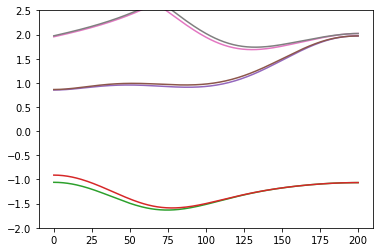

In [140]:
# Dispersion from the K point to the Gamma point (origin)
plt.plot(disp)
plt.ylim(-2, 2.5)

In [141]:
disp = [energies(kx, 0, even=True, SOI=True) for kx in ks_K_gamma]

(-2, 2.5)

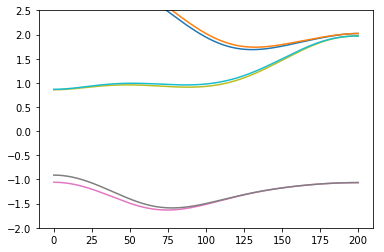

In [142]:
# Dispersion from the K point to the Gamma point (origin)
plt.plot(disp)
plt.ylim(-2, 2.5)

(0.8, 1.0)

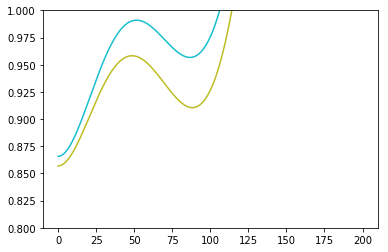

In [143]:
plt.plot(disp)
plt.ylim(0.8, 1.0)

In [144]:
# Momentum from the Gamma point to the M point
ks_gamma_M = np.linspace(0, 4*np.pi/3 * np.sqrt(3)/2., 201)

In [145]:
disp = [energies(0, ky, even=True, SOI=True) for ky in ks_gamma_M]

(-2, 2.5)

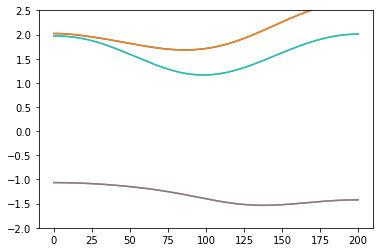

In [146]:
plt.plot(disp)
plt.ylim(-2, 2.5)

In [147]:
disp = [energies(0, ky, even=False, SOI=True) for ky in ks_gamma_M]

(-2, 2.5)

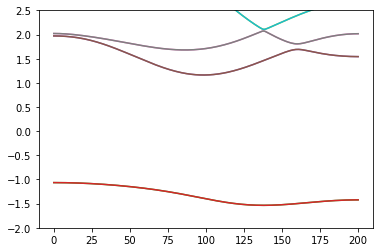

In [148]:
plt.plot(disp)
plt.ylim(-2, 2.5)

In [90]:
energies(4*np.pi/3.0, 0)

array([-9.87600321, -9.87416298, -7.14357394, -7.04886597, -3.15965491,
       -3.11648416, -1.05762179, -0.90946202,  0.85690491,  0.86573416,
        3.49094894,  3.59824097])

In [18]:
energies(-4*np.pi/3.0, 0)

array([-9.87600321, -9.87416298, -7.14357394, -7.04886597, -3.15965491,
       -3.11648416, -1.05762179, -0.90946202,  0.85690491,  0.86573416,
        3.49094894,  3.59824097])

## Check the eigenvectors and energies in the conduction band at the points $K$ and $-K$

In [19]:
cond_K_vecs = eigvecs(4*np.pi/3.0, 0)[:, 8:10]

In [20]:
cond_K_vecs[:, 0]

array([  9.12157692e-01 +0.00000000e+00j,
        -1.11022302e-16 +1.18260340e-31j,
         1.23259516e-31 +1.61017308e-16j,
         9.66697835e-33 +2.89800229e-01j,
         2.89800229e-01 +9.66697835e-33j,
         7.76604544e-17 -7.13189067e-33j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,   0.00000000e+00 +0.00000000e+00j])

In [21]:
cond_K_vecs[:, 1]

array([  0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         9.10146128e-01 +0.00000000e+00j,
        -1.11022302e-16 +2.43709589e-31j,
         2.09541178e-31 +2.58082763e-16j,
         7.87453185e-32 +2.92945409e-01j,
         2.92945409e-01 +7.87453185e-32j,   8.75263829e-17 +1.05411234e-32j])

In [22]:
energies(4*np.pi/3.0, 0)[8:10]

array([ 0.85690491,  0.86573416])

In [23]:
cond_mK_vecs = eigvecs(-4*np.pi/3.0, 0)[:, 8:10]

In [24]:
cond_mK_vecs[:, 0]

array([  0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         9.12157692e-01 +0.00000000e+00j,
        -1.11022302e-16 -1.11803958e-31j,
         1.10933565e-31 -1.61017308e-16j,
         2.97535302e-32 -2.89800229e-01j,
         2.89800229e-01 -2.97535302e-32j,   7.76604544e-17 +2.99586480e-32j])

In [25]:
cond_mK_vecs[:, 1]

array([  9.10146128e-01 +0.00000000e+00j,
        -1.11022302e-16 -2.29203572e-31j,
         1.23259516e-31 -2.58082763e-16j,
         8.73820786e-32 -2.92945409e-01j,
         2.92945409e-01 -8.73820786e-32j,
         8.75263829e-17 -4.42111727e-33j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,   0.00000000e+00 +0.00000000e+00j])

In [26]:
energies(-4*np.pi/3.0, 0)[8:10]

array([ 0.85690491,  0.86573416])

## Same for the top valence band

In [27]:
val_K_vecs = eigvecs(4*np.pi/3.0, 0)[:, 6:8]

In [28]:
val_K_vecs[:, 0]

array([ -1.48213188e-16 +0.00000000e+00j,
        -7.02682607e-01 +1.25276872e-15j,
         1.33226763e-15 +7.02682607e-01j,
        -5.78483109e-17 -1.51408742e-16j,
         1.69662447e-16 -5.78483109e-17j,
         1.11688445e-01 -2.61485979e-16j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,   0.00000000e+00 +0.00000000e+00j])

In [29]:
val_K_vecs[:, 1]

array([  0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         3.01398726e-16 +0.00000000e+00j,
         7.02828062e-01 -1.15457714e-15j,
        -1.52655666e-15 -7.02828062e-01j,
        -1.24496950e-17 +1.16794627e-17j,
        -3.17875246e-17 -1.24496950e-17j,  -1.09842757e-01 +1.06903547e-16j])

In [30]:
energies(4*np.pi/3.0, 0)[6:8]

array([-1.05762179, -0.90946202])

In [31]:
val_mK_vecs = eigvecs(-4*np.pi/3.0, 0)[:, 6:8]

In [32]:
val_mK_vecs[:, 0]

array([  0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
        -1.48213188e-16 +0.00000000e+00j,
        -7.02682607e-01 -1.21134277e-15j,
         1.47104551e-15 -7.02682607e-01j,
        -3.87415879e-18 +1.97395686e-16j,
         1.23675504e-16 +3.87415879e-18j,   1.11688445e-01 +3.10804338e-16j])

In [33]:
val_mK_vecs[:, 1]

array([  3.01398726e-16 +0.00000000e+00j,
         7.02828062e-01 +9.90980231e-16j,
        -1.16573418e-15 +7.02828062e-01j,
        -2.07570159e-17 -2.51487265e-17j,
        -1.83182607e-17 +2.07570159e-17j,
        -1.09842757e-01 -9.31225185e-17j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,
         0.00000000e+00 +0.00000000e+00j,   0.00000000e+00 +0.00000000e+00j])

In [34]:
energies(-4*np.pi/3.0, 0)[6:8]

array([-1.05762179, -0.90946202])

## Crossings

In [35]:
# energies(4*np.pi/3.0, 0, even=True, SOI=True)[14:16]
energies(4*np.pi/3.0, 0, even=True, SOI=True)[8:10]

array([ 0.85690491,  0.86573416])

In [36]:
# energies(4*np.pi/3.0, 0, even=True, SOI=True)#[14:16]

In [37]:
ks = np.linspace(0.0, 1.0, 201)

In [38]:
theta = np.pi*0.0
disp = [energies(k*cos(theta) + 4*np.pi/3.0, k*sin(theta), even=True, SOI=True) for k in ks]

(0.85, 1.2)

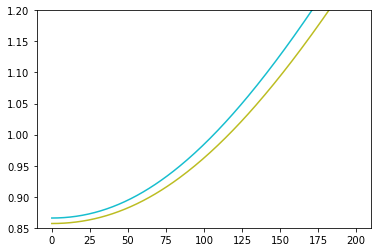

In [39]:
plt.plot(disp)
plt.ylim(0.85, 1.2)

In [40]:
def evaluate_on_grid(X, Y, func):
    """ X, Y should be in np.meshgrid form. It's enough for func to work on floats. """
    data = []
    for xx, yy in zip(X, Y):
        data.append([func(i,j) for i, j in zip(xx, yy)])
    data = np.array(data)
    return data

def get_splitting(even=True, SOI=True):
    def func(kx, ky):
        if even:
            Es= energies(kx, ky, even=even, SOI=SOI)[8:10]
        else:
            Es= energies(kx, ky, even=even, SOI=SOI)[14:16]
        return Es[1] - Es[0]
    return func

In [41]:
kmax = 1.0
# Generate a circular mesh
N = 100
r = np.linspace(0, kmax, N)
p = np.linspace(0, 2*np.pi, N)
r, p = np.meshgrid(r, p)
# Center the mesh at K
x, y = r*np.cos(p) + 4*np.pi/3.0, r*np.sin(p)
splitting = evaluate_on_grid(x, y, func=get_splitting(even=False, SOI=True))

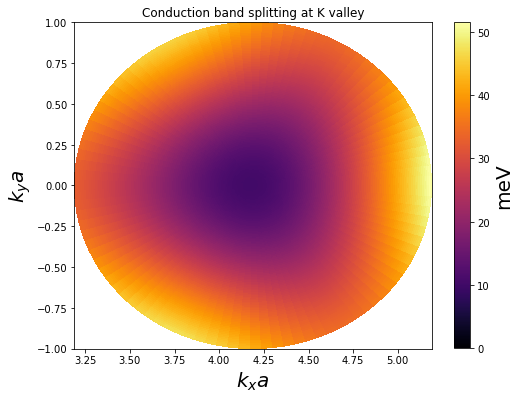

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.pcolor(x, y, 1000*splitting, cmap='inferno', vmin=0) #, aspect='auto')
plt.colorbar().set_label(label=r'meV',size=20)
ax.set_title('Conduction band splitting at K valley')
ax.set_xlabel('$k_x a$', fontsize=20)
ax.set_ylabel('$k_y a$', fontsize=20)

In [43]:
lambda_Ms = np.linspace(0, 0.4, 201)

In [44]:
cond_split = [K_cond_splitting(lambda_M, lambda_S=0.052, even=False) for lambda_M in lambda_Ms]

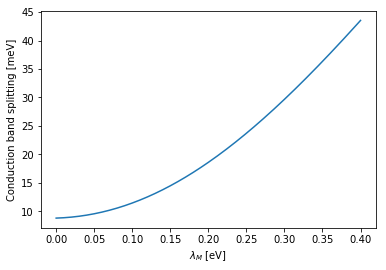

In [45]:
plt.plot(lambda_Ms, 1000*np.array(cond_split))
plt.xlabel(r'$\lambda_M$ [eV]')
plt.ylabel(r'Conduction band splitting [meV]')

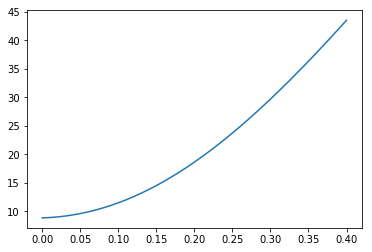

In [46]:
plt.plot(lambda_Ms, 1000*np.array(cond_split))

In [47]:
lambda_Ss = np.linspace(0, 0.1, 201)

In [48]:
cond_split = [K_cond_splitting(lambda_M=0.075, lambda_S=lambda_S, even=False) for lambda_S in lambda_Ss]

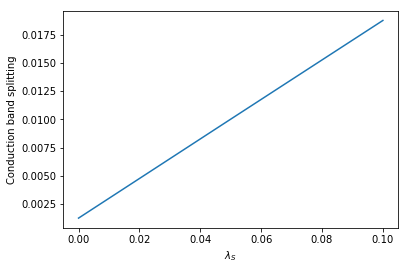

In [49]:
plt.plot(lambda_Ss, np.array(cond_split))
plt.xlabel(r'$\lambda_S$')
plt.ylabel(r'Conduction band splitting')

# Eigenvectors at $K$

$\boldsymbol{K} = 4\pi/3a(1,0)$

In [59]:
kx = 4*np.pi/3
ky = 0

In [60]:
energies(kx, ky, SOI=False, even=True)

array([-9.87507543, -7.09616448, -3.13804571, -0.98354957,  0.86129571,
        3.54453948])

In [61]:
vecs = eigvecs(kx, ky, SOI=False, even=True)

In [62]:
vecs[:, 4]

array([  9.11158942e-01 +0.00000000e+00j,
        -1.11022302e-16 -2.37947881e-31j,
        -2.58844985e-31 +2.52429298e-16j,
        -3.19274070e-32 +2.91366935e-01j,
         2.91366935e-01 -3.19274070e-32j,   8.69176176e-17 +5.99919513e-32j])

In [63]:
cond_band = vecs[:, 4]

In [64]:
cond_band

array([  9.11158942e-01 +0.00000000e+00j,
        -1.11022302e-16 -2.37947881e-31j,
        -2.58844985e-31 +2.52429298e-16j,
        -3.19274070e-32 +2.91366935e-01j,
         2.91366935e-01 -3.19274070e-32j,   8.69176176e-17 +5.99919513e-32j])

In [65]:
vecs[:, 4].T.conj().dot(vecs[:, 4])

(1+0j)

In [68]:
lambda_M=0.075; lambda_S=0.052
SOI_MEEuu = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, -1j*lambda_M, 0, 0, 0],
                [0, 1j*lambda_M, 0, 0, 0, 0],
                [0, 0, 0, 0, -0.5*1j*lambda_S, 0],
                [0, 0, 0, 0.5*1j*lambda_S, 0, 0],
                [0, 0, 0, 0, 0, 0]])

In [69]:
cond_band.T.conj().dot(SOI_MEEuu).dot(cond_band)

(-0.004414523928299682-4.276423536147513e-50j)